<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/UnivariateTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Develop LSTM Models For Univariate Time Series Forecasting

In [15]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [16]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [17]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [18]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [19]:
X.shape

(6, 3)

In [20]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [30]:
X.shape

(6, 3, 1)

### Building LSTM Model

In [21]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=0)


### Predicting For the next 10 data

In [43]:
teste = model
teste

In [32]:
len(lst_output)

10

In [72]:
# demonstrate prediction for next 10 days

def autoGen(x_input,output_size=10,n_steps=3,n_features=1,model_type=model):   
  '''
  This function will auto generate the next predict data. 
  The Variables Are:
  x_input: The incial data
  output_size: the size of the output série
  n_stpes: How many points they use to predeic "The lookback"
  n_features: How many points they will predict
  model_type: The type of useble model
  '''

  model = model_type

  #x_input = np.array([187, 196, 210])
  temp_input=list(x_input)
  lst_output=[]
  i=0
  while(i<output_size):
  
      if(len(temp_input)>3):
          x_input=np.array(temp_input[1:])
          print("{} day input {}".format(i,x_input))
          #print(x_input)
          x_input = x_input.reshape((1, n_steps, n_features))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          print("{} day output {}".format(i,yhat))
          temp_input.append(yhat[0][0])
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.append(yhat[0][0])
          i=i+1
      else:
          #x_input = x_input.reshape((1, n_steps, n_features))
          x_input = np.reshape(x_input,(1, n_steps, n_features))
          yhat = model.predict(x_input, verbose=0)
          print(yhat[0])
          temp_input.append(yhat[0][0])
          lst_output.append(yhat[0][0])
          i=i+1
      
  print(lst_output)

In [92]:
#def autoGen(x_input,output_size=10,n_steps=3,n_features=1,model_type=model):  
lista = [187, 196, 210]
lista = [225.69577, 237.54959, 253.02342, 269.00613, 283.60583, 300.85144, 318.41226, 335.936, 355.5212, 375.611, 396.43127, 419.02634, 442.4446, 467.0681, 493.3911]
autoGen(lista,10,3,1,model_type=teste)

0 day input [237.54959 253.02342 269.00613 283.60583 300.85144 318.41226 335.936
 355.5212  375.611   396.43127 419.02634 442.4446  467.0681  493.3911 ]


ValueError: ignored

In [23]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [24]:
len(timeseries_data)

9

In [25]:
lst_output

[225.69577,
 237.54959,
 253.02342,
 269.00613,
 283.60583,
 300.85144,
 318.41226,
 335.936,
 355.5212,
 375.611]

### Visualizaing The Output

In [26]:
import matplotlib.pyplot as plt

In [27]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

ValueError: ignored

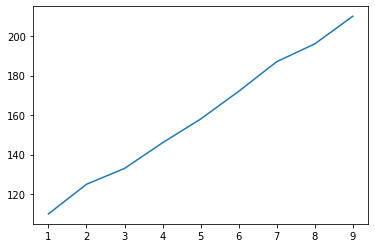

In [91]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
